In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')
# dataset.head()

In [109]:
# dataset.nunique()

In [110]:
dataset.shape

(34857, 21)

In [111]:
cols_to_use = ['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount', 
              'Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea', 'Price']
# cols_to_use = ['Price','Landsize','BuildingArea','Distance','Rooms','Bedroom2','Bathroom','Car']
# #                'Suburb','Type','Method']
dataset = dataset[cols_to_use]
dataset.head()
dataset.shape

(34857, 15)

In [112]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [113]:
cols_to_fill_zero = ['Propertycount','Distance','Bedroom2','Bathroom','Car']
# cols_to_fill_zero = ['Distance','Bedroom2','Bathroom','Car']

dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [114]:
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['Landsize'] = dataset['Landsize'].   replace(0,dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
# dataset[dataset["Rooms"   ] >= 8] = np.nan
# dataset[dataset["Bedroom2"] >= 8] = np.nan
# dataset[dataset["Bathroom"] >= 5] = np.nan
# dataset[dataset["Car"     ] >= 5] = np.nan
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [115]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [116]:

dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()
dataset.to_csv('myDataFrame.csv')


In [119]:
# dataset = pd.read_csv('./myDataFrame.csv')
# dataset = dataset.drop('Unnamed: 0', axis = 1)
dataset.head()
# dataset.isnull().any()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


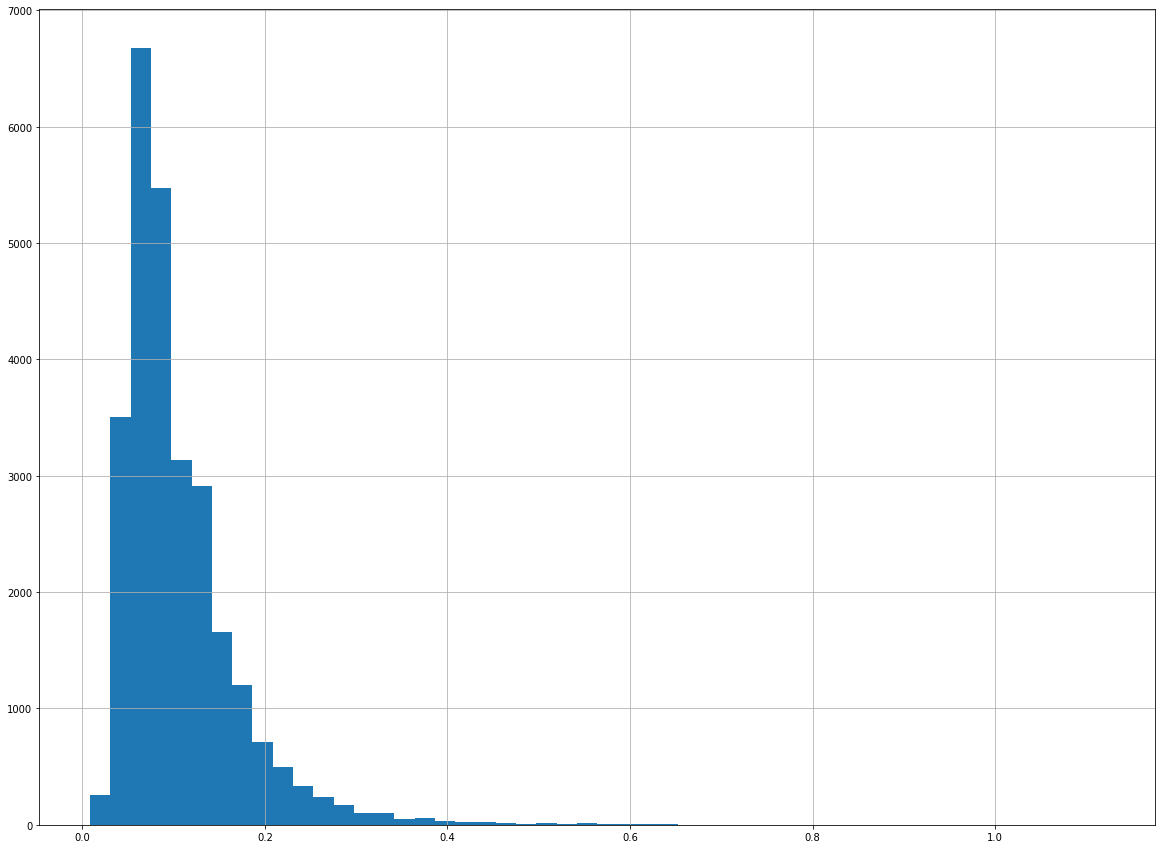

In [161]:
X = dataset.drop('Price', axis = 1)
y = dataset['Price']/1e7

# y.
# y = np.log10(y)

%matplotlib inline
import matplotlib.pyplot as plt
y.hist(bins=50, figsize=(20,15))
plt.show()

In [162]:
# from sklearn.datasets import  fetch_california_housing
# X, y = fetch_california_housing(return_X_y = True, as_frame = True)
# housing = pd.concat([X, y], axis=1)
# housing.head()
# housing = pd.DataFrame(housing.data,columns=housing.feature_names)
# # housing.head()
# # print(housing.data)
# # print(housing.target)
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))
# plt.show()
# X_train_full, X_test , y_train_full, y_test  = train_test_split(housing.data, housing.target)

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

X_train_full, X_test, y_train_full, y_test  = train_test_split(X, y)

X_train, X_valid, y_train , y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()  # scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test  = scaler.fit_transform(X_test)

print(type(X_train))

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)

<class 'numpy.ndarray'>


In [203]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation = "relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(50, activation = "relu"))
model.add(keras.layers.Dense(50, activation = "relu"))
model.add(keras.layers.Dense(1))

model.compile(loss = "mean_squared_error", optimizer = "sgd")

In [204]:
history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_valid, y_valid))

Train on 15324 samples, validate on 5109 samples
Epoch 1/40
15324/15324 [==============================] - 2s 130us/sample - loss: 0.0314 - val_loss: 0.0125
Epoch 2/40
15324/15324 [==============================] - 1s 97us/sample - loss: 0.0094 - val_loss: 0.0092
Epoch 3/40
15324/15324 [==============================] - 1s 97us/sample - loss: 0.0060 - val_loss: 0.0080
Epoch 4/40
15324/15324 [==============================] - 2s 98us/sample - loss: 0.0049 - val_loss: 0.0072
Epoch 5/40
15324/15324 [==============================] - 2s 103us/sample - loss: 0.0043 - val_loss: 0.0068
Epoch 6/40
15324/15324 [==============================] - 2s 103us/sample - loss: 0.0039 - val_loss: 0.0064
Epoch 7/40
15324/15324 [==============================] - 2s 102us/sample - loss: 0.0036 - val_loss: 0.0061
Epoch 8/40
15324/15324 [==============================] - 2s 105us/sample - loss: 0.0034 - val_loss: 0.0059
Epoch 9/40
15324/15324 [==============================] - 2s 106us/sample - loss: 0.0032 -

In [205]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

6811/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0035102798954139715


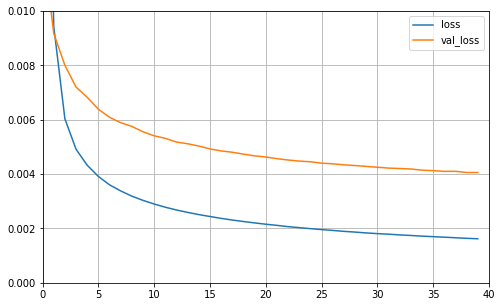

In [206]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,.01)
plt.gca().set_xlim(0,40)
plt.show()

In [208]:
# print(mse_test)
X_new = X_test[:4]
# print(X_new)
y_prep = model.predict(X_new)
print(y_test[:4])
y_prep[:4].T

[1.20959393 1.16144861 1.17652186 1.17869109]


array([[1.3387254, 1.1923091, 1.3040235, 1.1847755]], dtype=float32)